# Меня ждут миллионы

Обучите простую модель предсказания цены акций. Используйте один из рассмотренных на лекции "Временные последовательности" алгоритмов предсказания рядов. Можно использовать и более сложные алгоритмы предсказания рядов


1. Найдите данные о цене любого биржевого актива

    Данные должны содержать значение цены актива как минимум за каждый день и длительностю как минимум за год. 

    Найти данные можно на kaggle или использовать FAANG датасет из 1 лабораторной


2. Предобработайте данные

    Временной ряд сложно предсказывать по дням. Сделайте ряд по неделям или месяцам
   
    Удалите из ряда тренд, если он есть. Используйте другие рассмотренные на лекции приёмы


3. Обучите модель
    
    Обучите модель на 80% временного ряда
    
    Предскажите оставшиеся 20% (как минимум 3 точки) ряда с помощью модели 
    
    Отобразите на графике предсказание модели и истинные данные


4. Посчитайте метрику

    Метрика должна отражать разницу между предсказанными и истинными данными. Можно выбрать меру MAPE, можно предложить свою

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Source: https://www.statsmodels.org/stable/install.html
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# # Импорт необходимых библиотек
# import copy
# import datetime
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('data/Ford.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,736.789978,738.989990,732.500000,733.530029,733.530029,1301300
1,2016-03-29,734.590027,747.250000,728.760010,744.770020,744.770020,1903800
2,2016-03-30,750.099976,757.880005,748.739990,750.530029,750.530029,1782400
3,2016-03-31,749.250000,750.849976,740.940002,744.950012,744.950012,1718800
4,2016-04-01,738.599976,750.340027,737.000000,749.909973,749.909973,1576700


In [78]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df = df.set_index(['Date'])
df.sort_index(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-03-28,736.789978,738.989990,732.500000,733.530029,733.530029,1301300
2016-03-29,734.590027,747.250000,728.760010,744.770020,744.770020,1903800
2016-03-30,750.099976,757.880005,748.739990,750.530029,750.530029,1782400
2016-03-31,749.250000,750.849976,740.940002,744.950012,744.950012,1718800
2016-04-01,738.599976,750.340027,737.000000,749.909973,749.909973,1576700


In [81]:
df.drop(['Open', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [82]:
df.tail()

,High
Date,
2021-03-22,2057.989990
2021-03-23,2072.302002
2021-03-24,2078.209961
2021-03-25,2058.870117
2021-03-26,2050.989990


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2016-03-28 to 2021-03-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    1260 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


In [84]:
df.isnull().sum()

High    0
dtype: int64

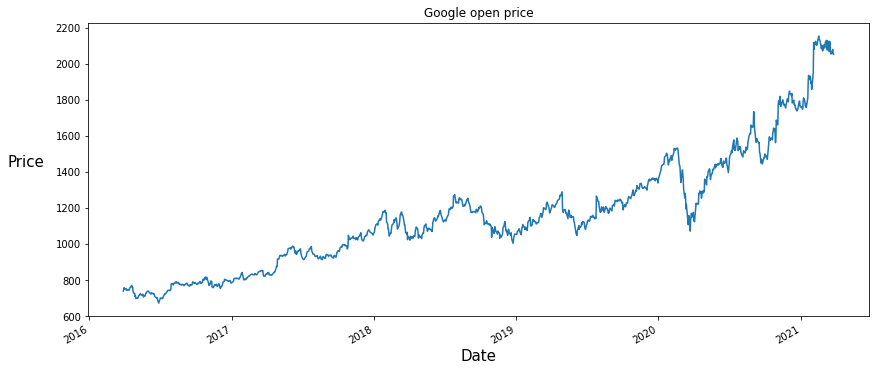

In [86]:
# Рассмотрим изменение цены
plt.figure(figsize=(14, 6))
plt.title('Google open price')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', rotation=0, labelpad=30, fontsize=15)
df['High'].plot();

In [88]:
df.shape

(1260, 1)

In [89]:
df = df.resample("M").mean()
df.shape

(61, 1)

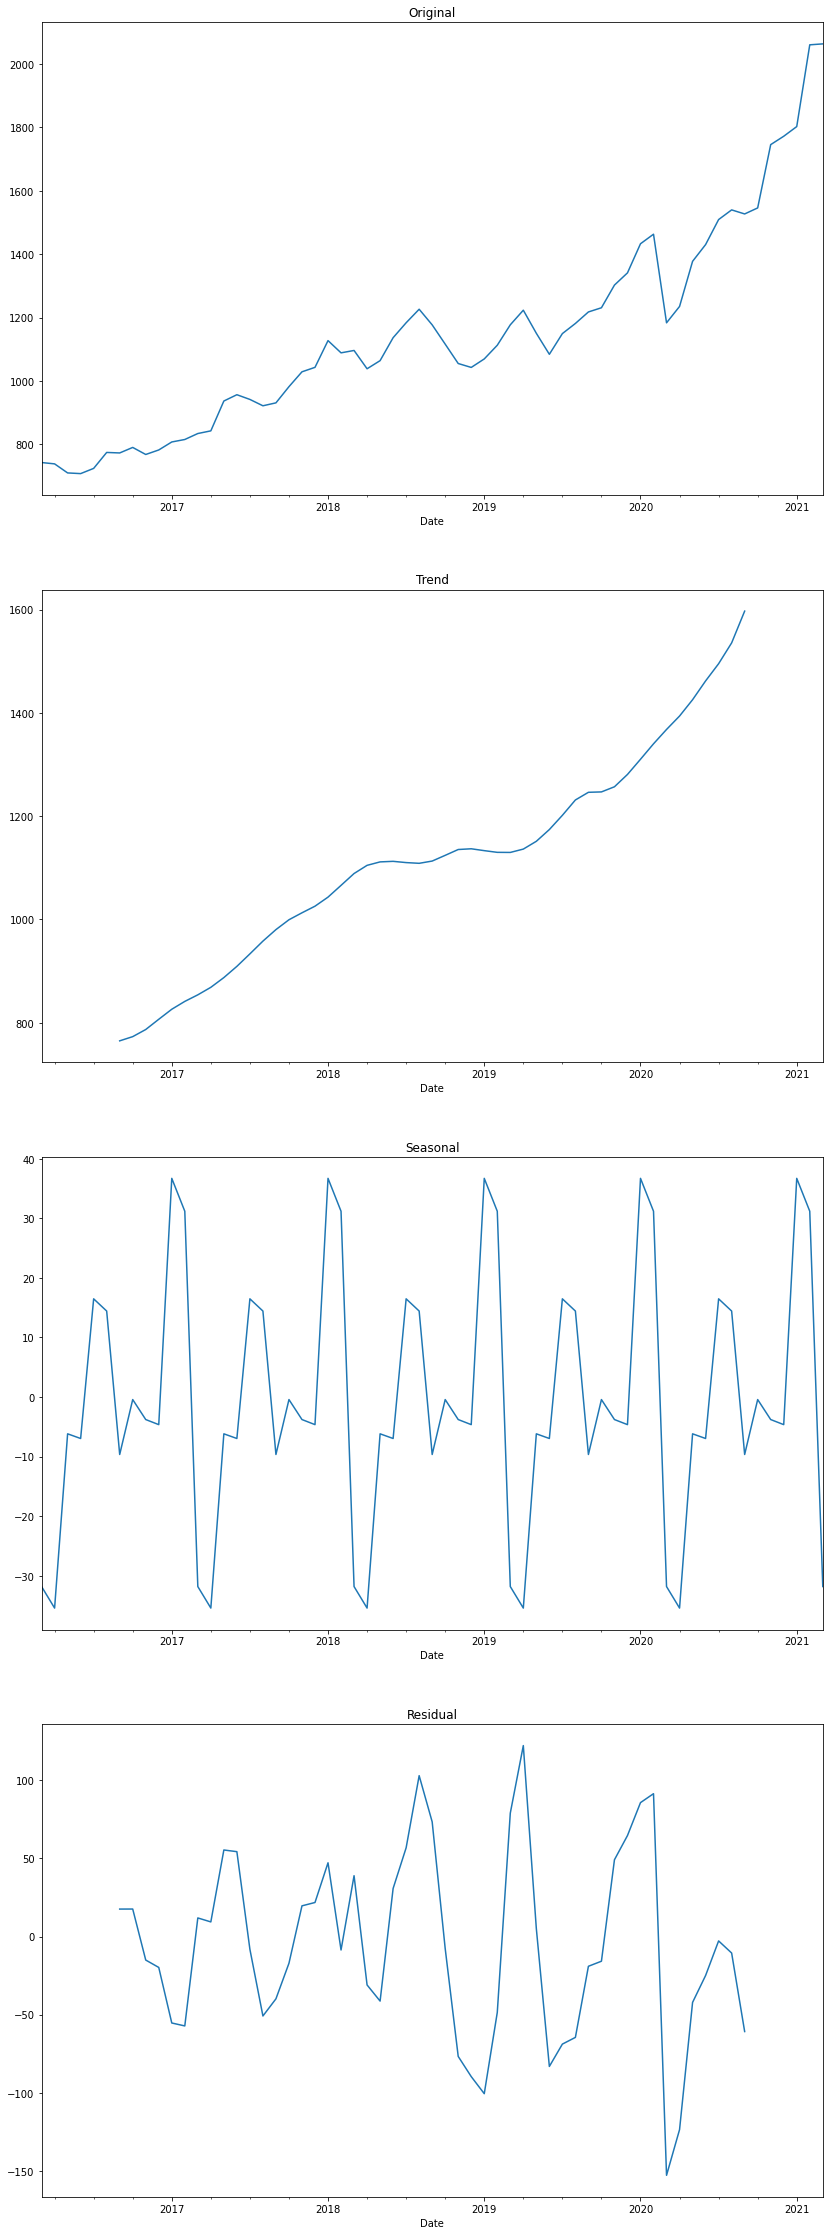

In [31]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# Разложим ряд на компоненты и проверим ответы на вопросы

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(df[['Open']], period=12)

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);

In [32]:
p_value = adfuller(df['Open'])[1]
print(df['Open'])

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!'
)

Date
2016-03-31     742.682495
2016-04-30     738.445711
2016-05-31     709.893331
2016-06-30     707.735909
2016-07-31     724.190500
                 ...     
2020-11-30    1745.357190
2020-12-31    1771.721153
2021-01-31    1802.270000
2021-02-28    2060.119462
2021-03-31    2063.065509
Freq: M, Name: Open, Length: 61, dtype: float64
Полученный уровень значимости (p-value): 0.9968. 0.9968 > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!


Попробуем привести ряд к стационарному.


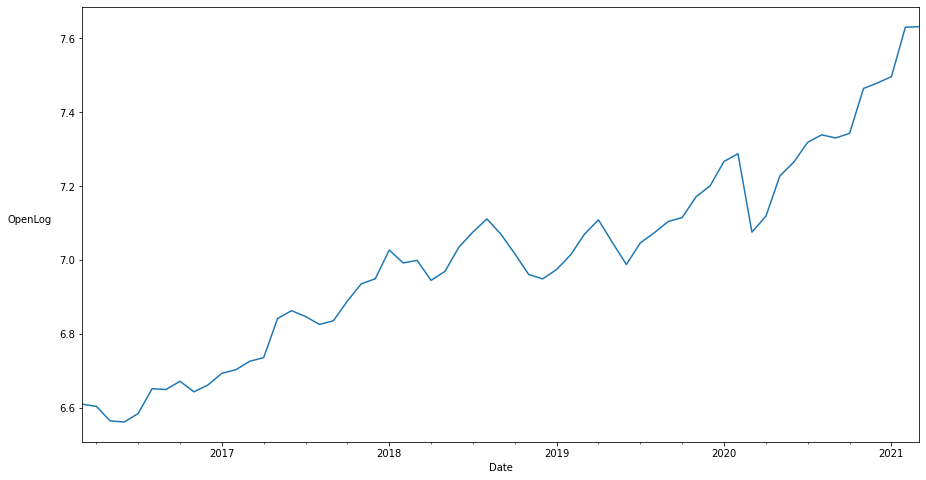

In [40]:
df['OpenLog'] = np.log(df['Open'])
plt.figure(figsize=(15, 8))
plt.ylabel('OpenLog', rotation=0, labelpad=30)
df['OpenLog'].plot();

In [ ]:
p_value = adfuller(df['OpenLog'][1:])[1]
print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!'
)

Полученный уровень значимости (p-value): 0.0925. 0.0925 > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!


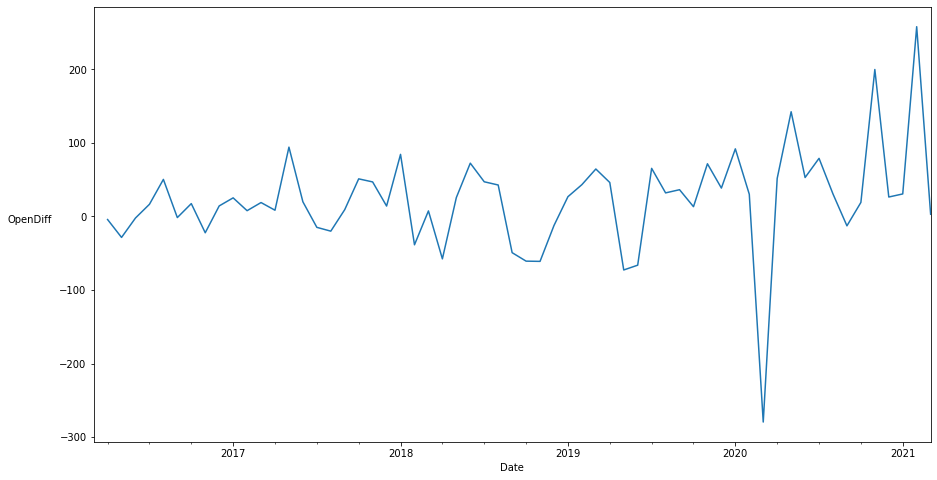

In [51]:
df['OpenLogDiff'] = df['OpenLog'].diff(12)

plt.figure(figsize=(15, 8))
plt.ylabel('OpenDiff', rotation=0, labelpad=30)
df['OpenDiff'].plot();


In [58]:
p_value = adfuller(df['OpenLogDiff'][12:])[1]
print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Нулевая гипотеза отвергнута в пользу альтернативной!'
)

Полученный уровень значимости (p-value): 0.1017. 0.1017 > 0.05. Нулевая гипотеза отвергнута в пользу альтернативной!


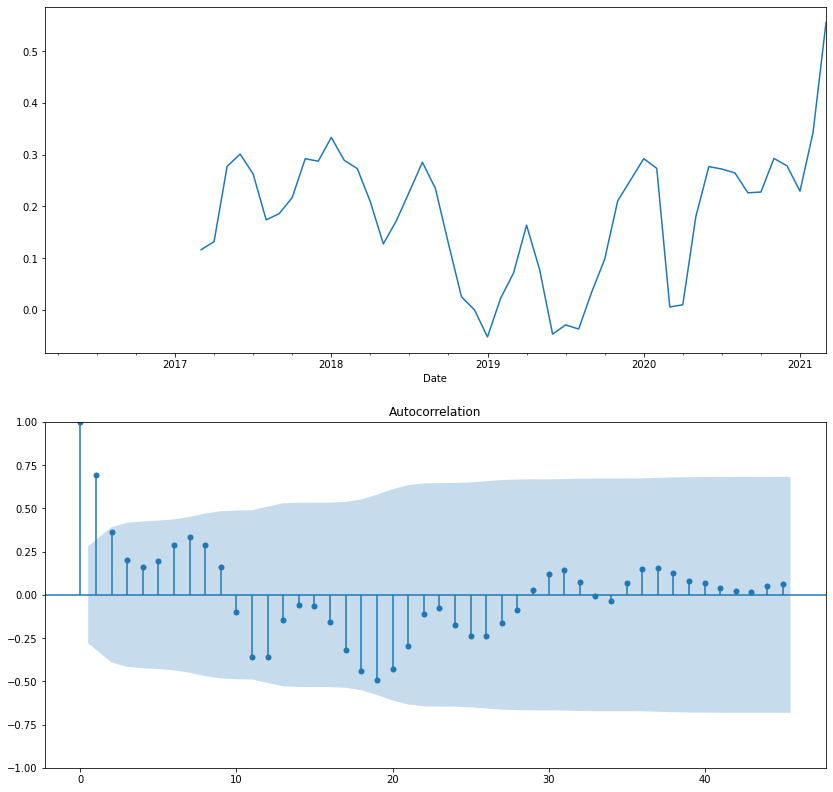

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plt.figure(figsize=(14, 14))

ax = plt.subplot(211)
df['OpenLogDiff'].plot(ax=ax)

ax = plt.subplot(212)
plot_acf(df['OpenLogDiff'][12:], lags=45, ax=ax);

In [74]:
d=1
D=1

qs = range(1, 5)
Qs = range(1, 3)

ps = range(1, 5)
Ps = range(3, 5)

size = len(df.OpenLogDiff)
percentile = int(0.8 * size)

X_train = df['OpenLogDiff'][:percentile]
X_test = df['OpenLogDiff'][percentile:]
y_train = df['Open'][:percentile]
y_test = df['Open'][percentile:]

In [67]:
from itertools import product
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

64

In [69]:
%%time
#warnings.filterwarnings('ignore')
import statsmodels.api as sm
from tqdm import tqdm


results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    try:
        model = sm.tsa.statespace.SARIMAX(
            df['OpenLogDiff'], 
            order=(param[0], d, param[1]), 
            seasonal_order=(param[2], D, param[3], 12)
        ).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

#warnings.filterwarnings('default')

  0%|          | 0/64 [00:00<?, ?it/s]c:\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  2%|▏         | 1/64 [00:03<03:13,  3.07s/it]c:\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle

Wall time: 15min 15s


In [70]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters         aic
12  (1, 4, 3, 1)  122.515039
13  (1, 4, 3, 2)  124.532004
14  (1, 4, 4, 1)  124.580444
15  (1, 4, 4, 2)  126.402866
0   (1, 1, 3, 1)  126.596058


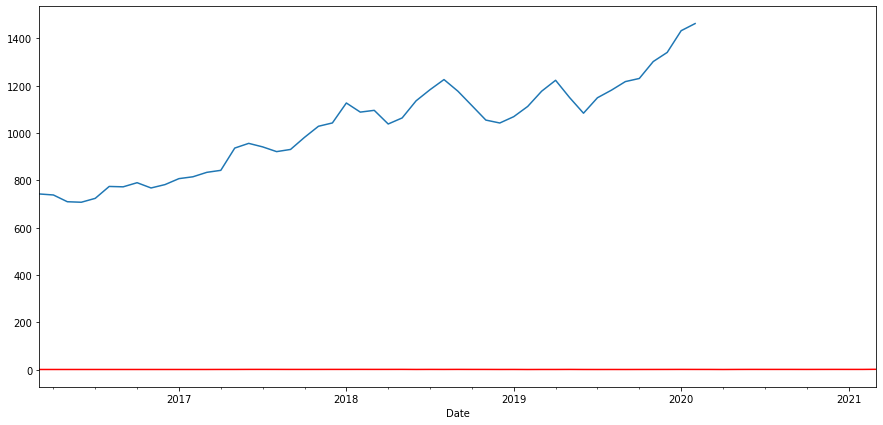

In [75]:
import numpy as np

y_train_pred = np.exp(best_model.fittedvalues)

plt.figure(figsize=(15,7))

y_train.plot()
y_train_pred.plot(c='r');